In [1]:
import numpy as np
import pandas as pd

In [57]:
# Load the pickled predictors
import pickle
predictors = pickle.load(open("predictors.pkl", "rb"))

#  Do we need to mess with this?
#  Recurrent Neural Networks for Multivariate Time Series with Missing Values
#  https://www.nature.com/articles/s41598-018-24271-9
predictors.head()

,gold,crude_oil,gas,bit_cap,futures_2,futures_10
Date,,,,,,
1985-01-02,306.25,25.92,NaN,NaN,NaN,78.62500
1985-01-03,299.50,25.84,NaN,NaN,NaN,79.06250
1985-01-04,303.45,25.18,NaN,NaN,NaN,78.84375
1985-01-07,296.75,25.56,NaN,NaN,NaN,79.84375
1985-01-08,304.40,25.48,NaN,NaN,NaN,80.00000


In [89]:
daily_stock = pickle.load(open("daily_stock.pkl", "rb"))
daily_stock[["AAPL"]]

Index(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13', '2013-02-14',
       '2013-02-15', '2013-02-19', '2013-02-20', '2013-02-21', '2013-02-22',
       ...
       '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30', '2018-01-31',
       '2018-02-01', '2018-02-02', '2018-02-05', '2018-02-06', '2018-02-07'],
      dtype='object', name='date', length=1259)

In [93]:
examine = predictors[["gold", "crude_oil", "futures_10"]].fillna(0.0)
examine = examine.merge(daily_stock[["AAPL"]],
             how="outer", 
    right_index = True, 
    left_index = True
)
examine[~examine.AAPL.isnull()]

,gold,crude_oil,futures_10,AAPL
2013-02-08,1669.75,95.72,130.578125,67.8542
2013-02-11,1663.50,97.03,130.546875,68.5614
2013-02-12,1641.75,97.51,130.281250,66.8428
2013-02-13,1648.00,97.01,130.000000,66.7156
2013-02-14,1644.00,97.31,130.406250,66.6556
2013-02-15,1629.25,95.86,130.390625,65.7371
2013-02-19,1613.50,96.66,130.187500,65.7128
2013-02-20,1602.00,94.46,130.312500,64.1214
2013-02-21,1568.50,92.84,130.625000,63.7228
2013-02-22,1580.00,93.13,130.734375,64.4014


In [58]:
float_data = np.array()
print(len(float_data))

9640


In [60]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [61]:
# [ : val_slice : test_slice ]
val_slice = 800
test_slice = 1100


mean = float_data[:val_slice].mean(axis=0)
float_data -= mean
std = float_data[:val_slice].std(axis=0)
float_data /= std

float_data

array([[ -0.90982041,   0.91228863,  -0.96157074],
       [ -0.99903096,   0.89980064,  -0.9298276 ],
       [ -0.94682627,   0.79677473,  -0.94569917],
       ..., 
       [ 12.21272121,   7.13911256,   2.02908707],
       [ -4.95733614,  -3.13382007,  -6.66626754],
       [ -4.95733614,  -3.13382007,  -6.66626754]])

In [62]:
lookback = 5 # How many timesteps back the input data should go.
step = 1 # The period, in timesteps, at which you sample data. 
delay = 1 # How many timesteps in the future the target should be.
batch_size = 32 # Number big enough that it could be representatative of the whole 

train_gen = generator(float_data,
                        lookback=lookback,
                        delay=delay,
                        min_index=0,
                        max_index=val_slice,
                        shuffle=False,
                        step=step,
                        batch_size=batch_size)

val_gen = generator(float_data,
                        lookback=lookback,
                        delay=delay,
                        min_index=(val_slice+1),
                        max_index=test_slice,
                        step=step,
                        batch_size=batch_size)

test_gen = generator(float_data,
                        lookback=lookback,
                        delay=delay,
                        min_index=test_slice+1,
                        max_index=None,
                        step=step,
                        batch_size=batch_size)

val_steps = (test_slice - (val_slice+1) - lookback)
test_steps = (len(float_data) - (test_slice+1) - lookback)

In [63]:
print(val_steps, test_steps)
float_data.shape[-1] # number of variables

294 8534


3

In [64]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

In [65]:
model = Sequential()
# Can replace GRU with RNN or LTSM for experimentation.
model.add(layers.GRU(16, input_shape=(None, float_data.shape[-1]),
                    recurrent_dropout = .5))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')


In [66]:
history = model.fit_generator(train_gen,
                            steps_per_epoch=16, # 
                            epochs=16, # passes through the training data
                            validation_data=val_gen,
                            validation_steps=val_steps,
                             verbose=1)

Epoch 1/16
16/16 [==============================] - 2s 127ms/step - loss: 1.2543 - val_loss: 0.8575
Epoch 2/16
16/16 [==============================] - 1s 59ms/step - loss: 0.9445 - val_loss: 0.6710
Epoch 3/16
16/16 [==============================] - 1s 59ms/step - loss: 0.4943 - val_loss: 0.4801
Epoch 4/16
16/16 [==============================] - 1s 58ms/step - loss: 0.7126 - val_loss: 0.3672
Epoch 5/16
16/16 [==============================] - 1s 60ms/step - loss: 0.5051 - val_loss: 0.2485
Epoch 6/16
16/16 [==============================] - 1s 59ms/step - loss: 0.3404 - val_loss: 0.2388
Epoch 7/16
16/16 [==============================] - 1s 59ms/step - loss: 0.4984 - val_loss: 0.2103
Epoch 8/16
16/16 [==============================] - 1s 60ms/step - loss: 0.4028 - val_loss: 0.1829
Epoch 9/16
16/16 [==============================] - 1s 60ms/step - loss: 0.3177 - val_loss: 0.1932
Epoch 10/16
16/16 [==============================] - 1s 62ms/step - loss: 0.4566 - val_loss: 0.1804
Epoch 11

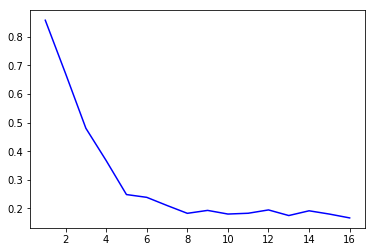

In [67]:
% matplotlib inline
val_loss = history.history['val_loss']
epochs = range(1, len(val_loss) + 1)

import matplotlib.pyplot as plt
plt.plot(epochs, val_loss, 'b', label='Validation loss')